##### Config

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Disable annoying font warnings
matplotlib.font_manager._log.setLevel(50)

# Disable theano deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='theano')

# Style
plt.style.use('default')
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 14
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Liberation Sans']
plt.rcParams['font.cursive'] = ['Liberation Sans']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.fallback_to_cm'] = True

In [4]:
del matplotlib; del plt; del warnings

##### Main

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.special import factorial
from utils import g

In [6]:
np.random.seed(0)

# Dimension of the problem
K = 3

# Order we will go up to
N = 10

# Random covariance and its Cholesky decomp.
L = 0.1 * np.tril(0.25 * np.random.randn(K, K) + np.eye(K))
Sig = L @ L.T

# The mean of all elements in the covariance matrix
barSig = np.mean(Sig)

# Ones vector & matrix
j = np.ones((K, 1))
J = np.ones((K, K))

Analytic expression for $P_n$, where $\mathbf{P}_n = P_n \mathbf{J}_K$:

In [7]:
def P(n):
    return (n + 1) * g(n) * barSig ** (n // 2)
    
P_analytic = [P(n) for n in np.arange(N)]

Numerical estimate of $P_n$:

In [8]:
# Number of samples we'll draw
M = 1000000

# Compute samples; 
# the mean over all samples is the value of P
p = np.empty((N, M))
for m in tqdm(range(M)):
    u = np.random.randn(K)
    for n in range(N):
        p[n, m] = ((n + 1) / K ** n) * (j.T @ L @ u) ** n

P_numerical = np.mean(p, axis=-1)

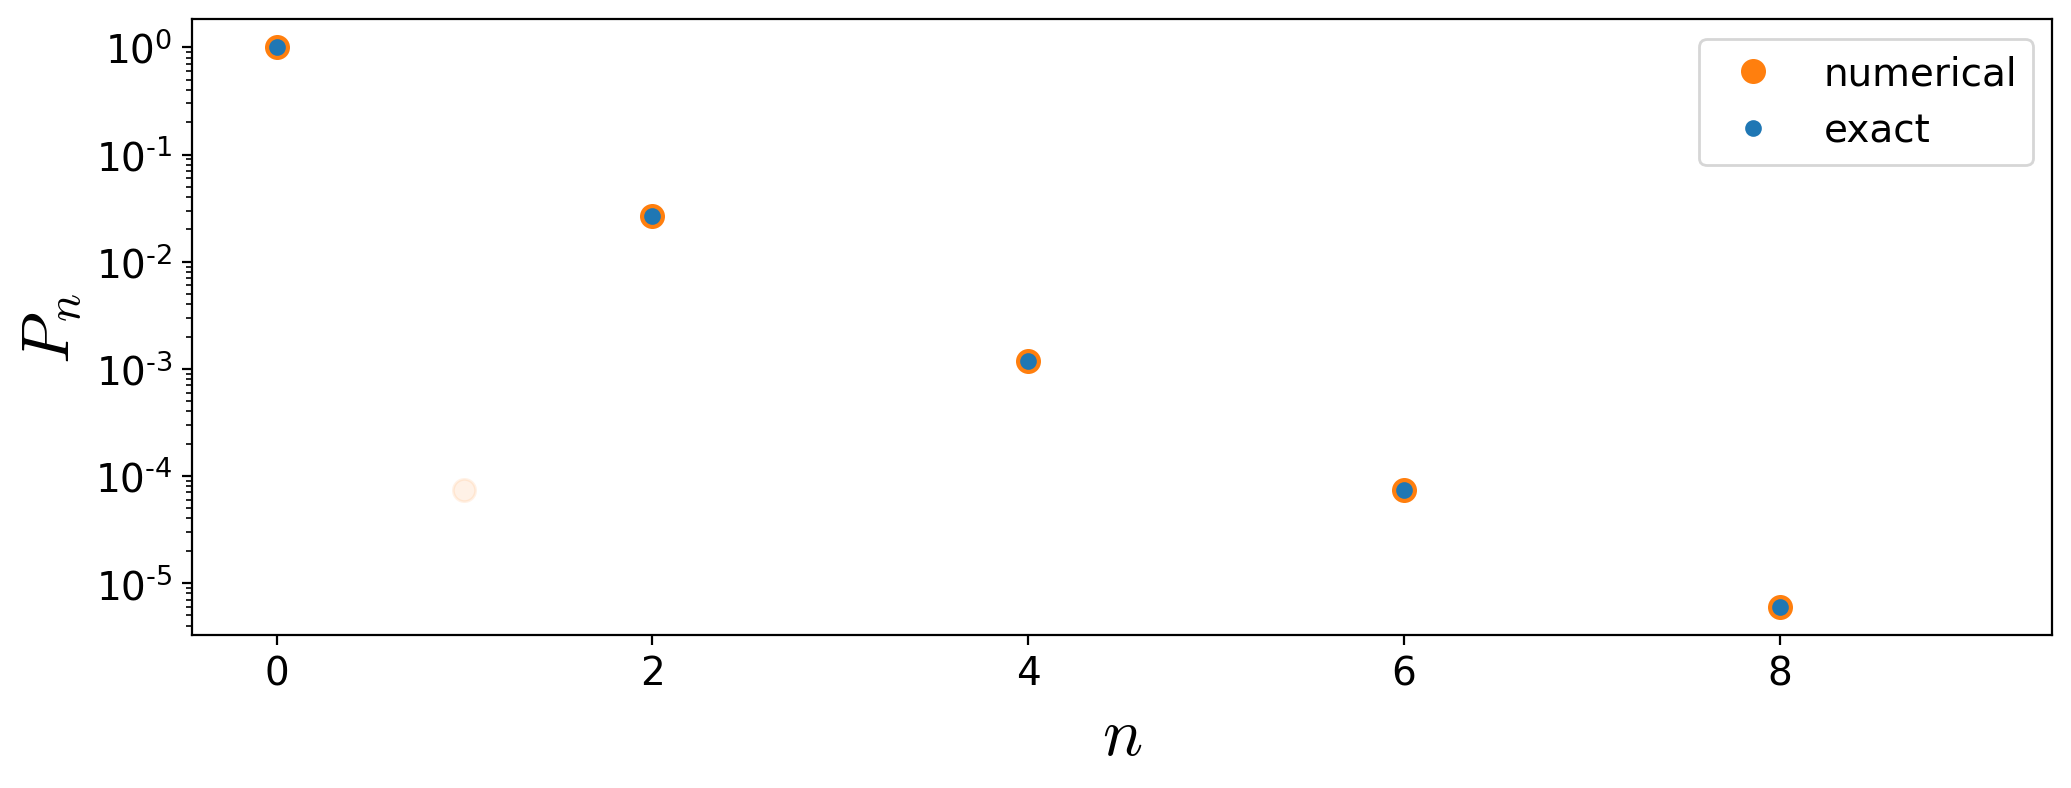

In [9]:
n = np.arange(N)
plt.plot(n[::2], P_numerical[::2], 'o', color="C1", ms=8, label="numerical")
plt.plot(n[1::2], P_numerical[1::2], 'o', color="C1", ms=8, alpha=0.1)
plt.plot(n, P_analytic, 'o', color="C0", ms=5, label="exact")
plt.legend()
plt.xlabel(r"$n$", fontsize=24)
plt.ylabel(r"$P_n$", fontsize=24)
plt.yscale("log");